In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# <b><font color="navy">Regresion lineal</span></font></b>

## 0. Replicar ejercicio Excel

### 0.1 Cargar datos ejercicio excel

In [44]:
ruta_datos_excel = r'dataset\datos_ejercicio_regresion_lineal.xlsx'
df_sm = pd.read_excel(ruta_datos_excel )
df_sm

,Demanda,Periodo,Pronostico Temp °C,Mes,Colegio Abierto
0,3025.0,1.0,2.800000,Enero,No
1,3136.0,2.0,3.888889,Febrero,Si
2,3414.0,3.0,7.777778,Marzo,Si
3,3502.0,4.0,13.333333,Abril,Si
4,3736.0,5.0,19.444444,Mayo,Si
5,3661.0,6.0,25.000000,Junio,No
6,3553.0,7.0,27.777778,Julio,No
7,3691.0,8.0,26.666667,Agosto,No
8,3474.0,9.0,22.777778,Septiembre,Si
9,3876.0,10.0,16.666667,Octubre,Si


In [45]:
# Adicionar Variable Dummy
def colegio_en_clase(columna):
    if columna == 'Si':
        return 1
    else:
        return 0
df_sm['Colegio_Abierto_Dummy'] =  df_sm['Colegio Abierto'].apply(colegio_en_clase)
df_sm

,Demanda,Periodo,Pronostico Temp °C,Mes,Colegio Abierto,Colegio_Abierto_Dummy
0,3025.0,1.0,2.800000,Enero,No,0
1,3136.0,2.0,3.888889,Febrero,Si,1
2,3414.0,3.0,7.777778,Marzo,Si,1
3,3502.0,4.0,13.333333,Abril,Si,1
4,3736.0,5.0,19.444444,Mayo,Si,1
5,3661.0,6.0,25.000000,Junio,No,0
6,3553.0,7.0,27.777778,Julio,No,0
7,3691.0,8.0,26.666667,Agosto,No,0
8,3474.0,9.0,22.777778,Septiembre,Si,1
9,3876.0,10.0,16.666667,Octubre,Si,1


### 0.2 Aplicar modelo regresion lineal desde statsmodel

**Ejercicio:** Usar prompt en ChatGPT


## 1. Cargar Datos

In [17]:
# Definir ubicacion datos
ruta_demanda = r'dataset\demanda_dia.csv'
ruta_fechas_especiales = r'dataset\fechas_esp.csv'
# Leer archivo
df = pd.read_csv(ruta_demanda)
df_fechas_esp = pd.read_csv(ruta_fechas_especiales)

In [18]:
df_fechas_esp = df_fechas_esp.apply(pd.to_datetime, format='%d-%m-%y', errors='coerce')
df_fechas_esp


,Amor_amistad,Dia_padre,Diciembre,Semana_santa,Dia_madre,Diciembre_1_sab
0,2018-09-15,2018-06-24,2018-01-01,2018-03-29,2018-05-13,2018-12-01
1,2018-09-16,2019-06-16,2018-05-01,2018-03-30,2019-05-12,2019-12-07
2,2019-09-21,2020-06-21,2018-07-20,2019-04-18,2020-05-10,2020-12-05
3,2019-09-22,2021-06-20,2018-08-07,2019-04-19,2021-05-09,2021-12-04
4,2020-09-19,2022-06-26,2018-12-07,2020-04-09,2021-05-30,2022-12-03
...,...,...,...,...,...,...
57,NaT,NaT,2024-12-07,NaT,NaT,NaT
58,NaT,NaT,2024-12-08,NaT,NaT,NaT
59,NaT,NaT,2024-12-24,NaT,NaT,NaT
60,NaT,NaT,2024-12-25,NaT,NaT,NaT


## 2. Pre-procesamiento de datos

In [19]:
# Asignar formato fecha a la columna FECHA
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d-%m-%y')

# Establecer FECHA como datetime index
df.set_index('FECHA', inplace=True)

# Filtrar fechas mayores a 2021-01-01
df = df[df.index >= '2021-01-01'].copy()
df

,COD_ALMACEN,COD_SKU,DESC_SKU,DEMANDA
FECHA,,,,
2021-01-31,W113,PT-011,SKU_11,5
2021-01-31,W113,PT-016,SKU_16,33
2021-01-31,W113,PT-026,SKU_26,15
2021-01-31,W113,PT-015,SKU_15,14
2021-01-31,W113,PT-137,SKU_137,3
...,...,...,...,...
2023-12-24,W113,PT-150,SKU_150,8
2023-12-24,W113,PT-218,SKU_218,2
2023-12-24,W113,PT-096,SKU_96,1


### 2.1 Llenar todas las fechas faltantes con 0

In [20]:
# Tabla dinamica para llenar fechas faltantes con cero´s
df = pd.pivot_table(data=df,
                         values='DEMANDA',
                         index=['COD_SKU','DESC_SKU'],
                         columns='FECHA',
                         aggfunc='sum',
                         fill_value=0).stack().reset_index() 

# Devolver nombre a columna de demanda ya que se pierde al hacer la tabla
df = df.rename(columns = {0:'DEMANDA'})

# Volver a asignar fecha como indice
df = df.set_index(df['FECHA'])
df

,COD_SKU,DESC_SKU,FECHA,DEMANDA
FECHA,,,,
2021-01-01,PT-001,SKU_1,2021-01-01,10
2021-01-02,PT-001,SKU_1,2021-01-02,12
2021-01-03,PT-001,SKU_1,2021-01-03,15
2021-01-04,PT-001,SKU_1,2021-01-04,11
2021-01-05,PT-001,SKU_1,2021-01-05,10
...,...,...,...,...
2023-12-27,PT-229,SKU_229,2023-12-27,0
2023-12-28,PT-229,SKU_229,2023-12-28,0
2023-12-29,PT-229,SKU_229,2023-12-29,0


## 3. Feature Engineering

### 3.1 Atributos a extraer desde la fecha

Son atributos que pueden extraerse desde la fecha de cada registro. Pueden ser entre otros: día de la semana, número de día, número
del mes, número del año, número de trimestre, días laborales, si es fin de semana, si es fin de mes, si es inicio de mes, número de días del mes

In [21]:
# Extrae el dia de la semana del index
df['DIA_SEM'] = df.index.weekday

# Extrae el Mes del index
df['MES'] = df.index.month

# Extrae el dia del mes del index
df['DIA'] = df.index.day

# Extrae el numero de la semana del index
df['SEMANA'] = df.index.isocalendar().week

# Extrae el numero del año del index
df['AÑO'] = df.index.year

df

,COD_SKU,DESC_SKU,FECHA,DEMANDA,DIA_SEM,MES,DIA,SEMANA,AÑO
FECHA,,,,,,,,,
2021-01-01,PT-001,SKU_1,2021-01-01,10,4,1,1,53,2021
2021-01-02,PT-001,SKU_1,2021-01-02,12,5,1,2,53,2021
2021-01-03,PT-001,SKU_1,2021-01-03,15,6,1,3,53,2021
2021-01-04,PT-001,SKU_1,2021-01-04,11,0,1,4,1,2021
2021-01-05,PT-001,SKU_1,2021-01-05,10,1,1,5,1,2021
...,...,...,...,...,...,...,...,...,...
2023-12-27,PT-229,SKU_229,2023-12-27,0,2,12,27,52,2023
2023-12-28,PT-229,SKU_229,2023-12-28,0,3,12,28,52,2023
2023-12-29,PT-229,SKU_229,2023-12-29,0,4,12,29,52,2023


### 3.2 Variable Dummy Festivos

In [22]:
# Importar libreria de festivos
import holidays

# Descargar festivos Colombia
festivos_colombia = holidays.CO()

# Filtrar por años necesarios
festivos_colombia = [items[0] for items in holidays.CO(years=[2021, 2022, 2023]).items()]

#festivos_colombia

In [24]:
# Adiciona un 1 si el index esta en festivo_colombia, si no esta, adiciona 0
df['FESTIVO'] = df.index.isin(pd.to_datetime(festivos_colombia)).astype(int)

df['AMOR_AMISTAD'] = df.index.isin(df_fechas_esp['Amor_amistad']).astype(int)
df['DIA_PADRE'] = df.index.isin(df_fechas_esp['Dia_padre']).astype(int)
df['SEMANA_SANTA'] = df.index.isin(df_fechas_esp['Semana_santa']).astype(int)
df['DICIEMBRE'] = df.index.isin(df_fechas_esp['Diciembre']).astype(int)
df['DIC_PRIMERO'] = df.index.isin(df_fechas_esp['Diciembre_1_sab']).astype(int)
df['DIA_MADRE'] = df.index.isin(df_fechas_esp['Dia_madre']).astype(int)


df#.query("FESTIVO == '1'")

,COD_SKU,DESC_SKU,FECHA,DEMANDA,DIA_SEM,MES,DIA,SEMANA,AÑO,FESTIVO,AMOR_AMISTAD,DIA_PADRE,SEMANA_SANTA,DICIEMBRE,DIC_PRIMERO,DIA_MADRE
FECHA,,,,,,,,,,,,,,,,
2021-01-01,PT-001,SKU_1,2021-01-01,10,4,1,1,53,2021,1,0,0,0,1,0,0
2021-01-02,PT-001,SKU_1,2021-01-02,12,5,1,2,53,2021,0,0,0,0,0,0,0
2021-01-03,PT-001,SKU_1,2021-01-03,15,6,1,3,53,2021,0,0,0,0,0,0,0
2021-01-04,PT-001,SKU_1,2021-01-04,11,0,1,4,1,2021,0,0,0,0,0,0,0
2021-01-05,PT-001,SKU_1,2021-01-05,10,1,1,5,1,2021,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,PT-229,SKU_229,2023-12-27,0,2,12,27,52,2023,0,0,0,0,0,0,0
2023-12-28,PT-229,SKU_229,2023-12-28,0,3,12,28,52,2023,0,0,0,0,0,0,0
2023-12-29,PT-229,SKU_229,2023-12-29,0,4,12,29,52,2023,0,0,0,0,0,0,0


### 3.3 Atributos tipo "LAGS"

Son "desfases" que se usan como atributos y que pueden aportar significativamente a que el algoritmo detecte la estacionalidad en la serie de tiempo. Primero debe agruparse la serie de tiempo por SKU y luego aplicar el desfase con la función apply lambda. Debe tenerse cuidado de que no se generen desfases entre SKU´s

In [28]:
# Adiciona una columna con la demanda desfasada 7 periodos
df['DEMANDA_LAG_7'] = df.groupby(['COD_SKU', 'DESC_SKU'])['DEMANDA'].shift(7)

df

,COD_SKU,DESC_SKU,FECHA,DEMANDA,DIA_SEM,MES,DIA,SEMANA,AÑO,FESTIVO,AMOR_AMISTAD,DIA_PADRE,SEMANA_SANTA,DICIEMBRE,DIC_PRIMERO,DIA_MADRE,DEMANDA_LAG_7
FECHA,,,,,,,,,,,,,,,,,
2021-01-01,PT-001,SKU_1,2021-01-01,10,4,1,1,53,2021,1,0,0,0,1,0,0,NaN
2021-01-02,PT-001,SKU_1,2021-01-02,12,5,1,2,53,2021,0,0,0,0,0,0,0,NaN
2021-01-03,PT-001,SKU_1,2021-01-03,15,6,1,3,53,2021,0,0,0,0,0,0,0,NaN
2021-01-04,PT-001,SKU_1,2021-01-04,11,0,1,4,1,2021,0,0,0,0,0,0,0,NaN
2021-01-05,PT-001,SKU_1,2021-01-05,10,1,1,5,1,2021,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,PT-229,SKU_229,2023-12-27,0,2,12,27,52,2023,0,0,0,0,0,0,0,0.0
2023-12-28,PT-229,SKU_229,2023-12-28,0,3,12,28,52,2023,0,0,0,0,0,0,0,0.0
2023-12-29,PT-229,SKU_229,2023-12-29,0,4,12,29,52,2023,0,0,0,0,0,0,0,0.0


# <b><font color="navy">Modelo 1</span></font></b>

## 4. Seleccionar SKU

In [29]:
SKU = 'PT-013'

In [30]:
# Seleccionar Referencia
df_modelo_1 = df[df['COD_SKU'] == SKU].copy()

# Eliminar NaN
df_modelo_1 = df_modelo_1.dropna(subset = 'DEMANDA_LAG_7')

df_modelo_1

,COD_SKU,DESC_SKU,FECHA,DEMANDA,DIA_SEM,MES,DIA,SEMANA,AÑO,FESTIVO,AMOR_AMISTAD,DIA_PADRE,SEMANA_SANTA,DICIEMBRE,DIC_PRIMERO,DIA_MADRE,DEMANDA_LAG_7
FECHA,,,,,,,,,,,,,,,,,
2021-01-08,PT-013,SKU_13,2021-01-08,7,4,1,8,1,2021,0,0,0,0,0,0,0,16.0
2021-01-09,PT-013,SKU_13,2021-01-09,20,5,1,9,1,2021,0,0,0,0,0,0,0,11.0
2021-01-10,PT-013,SKU_13,2021-01-10,38,6,1,10,1,2021,0,0,0,0,0,0,0,27.0
2021-01-11,PT-013,SKU_13,2021-01-11,20,0,1,11,2,2021,1,0,0,0,0,0,0,16.0
2021-01-12,PT-013,SKU_13,2021-01-12,4,1,1,12,2,2021,0,0,0,0,0,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,PT-013,SKU_13,2023-12-27,9,2,12,27,52,2023,0,0,0,0,0,0,0,19.0
2023-12-28,PT-013,SKU_13,2023-12-28,19,3,12,28,52,2023,0,0,0,0,0,0,0,17.0
2023-12-29,PT-013,SKU_13,2023-12-29,14,4,12,29,52,2023,0,0,0,0,0,0,0,22.0


## 5. Seleccionar Atributos y target

In [31]:
df_modelo_1.columns

Index(['COD_SKU', 'DESC_SKU', 'FECHA', 'DEMANDA', 'DIA_SEM', 'MES', 'DIA',
       'SEMANA', 'AÑO', 'FESTIVO', 'AMOR_AMISTAD', 'DIA_PADRE', 'SEMANA_SANTA',
       'DICIEMBRE', 'DIC_PRIMERO', 'DIA_MADRE', 'DEMANDA_LAG_7'],
      dtype='object')

In [32]:
# Seleccionar variables atributos
atributos = ['DIA_SEM',	'MES',	'DIA',	'SEMANA',	'AÑO',	'FESTIVO',	'AMOR_AMISTAD', 'DIA_PADRE', 'SEMANA_SANTA',
       'DICIEMBRE', 'DIC_PRIMERO', 'DIA_MADRE', 'DEMANDA_LAG_7']

# Separar atributos en X y target en y
X = df_modelo_1[atributos]
y = df_modelo_1['DEMANDA']

## 6. Set de entrenamiento y Set de testeo

In [33]:
# Dividir el set de datos: 80% Entrenamiento - 20% Testeo
punto_limite = int(len(df_modelo_1) * 0.8)

# Separar Set de atributos y target por fecha limite
X_train, X_test = X[:punto_limite], X[punto_limite:]
y_train, y_test = y[:punto_limite], y[punto_limite:]

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
            DIA_SEM  MES  DIA  SEMANA   AÑO  FESTIVO  AMOR_AMISTAD  DIA_PADRE  \
FECHA                                                                           
2021-01-08        4    1    8       1  2021        0             0          0   
2021-01-09        5    1    9       1  2021        0             0          0   
2021-01-10        6    1   10       1  2021        0             0          0   
2021-01-11        0    1   11       2  2021        1             0          0   
2021-01-12        1    1   12       2  2021        0             0          0   
...             ...  ...  ...     ...   ...      ...           ...        ...   
2023-05-23        1    5   23      21  2023        0             0          0   
2023-05-24        2    5   24      21  2023        0             0          0   
2023-05-25        3    5   25      21  2023        0             0          0   
2023-05-26        4    5   26      21  2023        0             0          0   
2023-05-27        5

## 7. Entrenamiento del modelo

In [34]:
# Importar Regresion Lineal de scikitlearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [40]:
# Entrenar el modelo con Lasso
lasso = Lasso(alpha=0.3)  # You can tune the alpha parameter
lasso.fit(X_train, y_train)

# Predecir en el set de testeo
y_pred = lasso.predict(X_test)

In [43]:
ridge = Ridge(alpha=1.5)  # You can tune the alpha parameter
ridge.fit(X_train, y_train)

# Predecir en el set de testeo
y_pred = ridge.predict(X_test)

In [35]:
# Entrenar el modelo
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Predecir en el set de testeo
y_pred = model_1.predict(X_test)


## 8. Función de métricas de error KPIs

In [36]:
def kpi(y_test, y_pred):
    
    # Aplicar estilo ggplot
    plt.style.use('ggplot')
    # Calcula MAE%
    mae_porc = (abs(y_test - y_pred).sum())/y_test.sum()
    # Calcula Sesgo
    sesgo = (y_test - y_pred).sum()/y_test.sum()
    # Muestra el MAE%
    print('MAE%: {:.2%}'.format(mae_porc)) 
    # Muestra el sesgo%
    print('Sesgo: {:.2%}'.format(sesgo)) 
    # Calcula el score
    score = mae_porc + abs(sesgo)
    # Muestra el score
    print('Score: {:.2%}'.format(score))

    #Grafica
    y_test_df = pd.DataFrame(y_test)
    
    # Graficar Demanda real vs Pronóstico
    plt.figure(figsize=(8, 3))
    plt.plot(y_test_df.index, y_test_df, label='Demanda', )
    plt.plot(y_test_df.index, y_pred, label='Pronóstico RL',  linestyle='--')
    plt.xlabel('Periodo', fontsize=10)
    plt.xticks(rotation=30, fontsize=7)
    plt.ylabel('Cantidad', fontsize=10)
    plt.title('Demanda vs Pronóstico')
    plt.legend()
    plt.show()


MAE%: 29.75%
Sesgo: 0.14%
Score: 29.89%


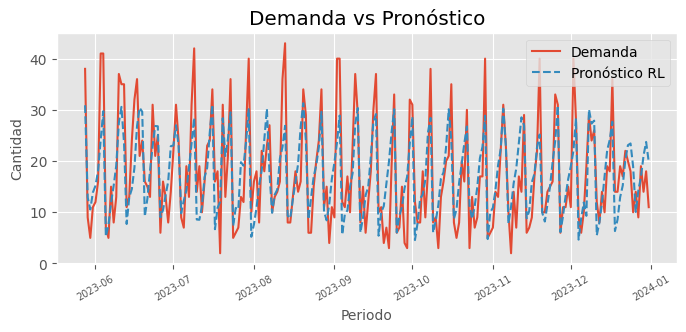

In [45]:
kpi(y_test, y_pred)

In [38]:
def importancia_atributos(model, X_test, y_test):

    # Extrae el coeficiente de cada atributo del resumen de scikitlearn
    importancia_atributos = np.abs(model.coef_)
    nombres_atributos = X_train.columns
    
    # Ordenar desdendentemente por importancia
    indice_ordenado = np.argsort(importancia_atributos)[::-1]
    importancia_ordenado = importancia_atributos[indice_ordenado]
    atributos_ordenados = nombres_atributos[indice_ordenado]
    
    # Caluculo de R cuadrado 
    r_cuadrado = model.score(X_test, y_test)
    print('R-cuadrado: {:.2%}'.format(r_cuadrado))
    
    # Calculo de R Cuadrado Ajustado
    n = len(y_test)
    k = X_test.shape[1]
    r_cuadrado_ajustado = 1 - (1 - r_cuadrado) * (n - 1) / (n - k - 1)
    print('R-cuadrado ajustado: {:.2%}'.format(r_cuadrado_ajustado))
    
    # Gráfica
    plt.figure(figsize=(6, 3))
    plt.bar(range(len(importancia_ordenado)), importancia_ordenado, align='center')
    plt.xticks(range(len(importancia_ordenado)), atributos_ordenados, rotation=30, fontsize=7)
    plt.ylabel('Importancia (Magnitud Coeficiente)', fontsize=8)
    plt.title('Importancia de Atributos en Regresion Lineal',fontsize=12)
    plt.show()

R-cuadrado: 59.99%
R-cuadrado ajustado: 57.44%


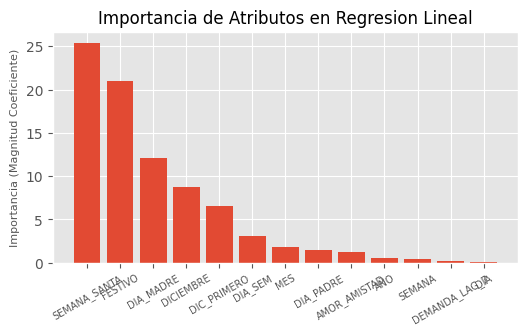

In [39]:
importancia_atributos(model_1, X_test, y_test)

R-cuadrado: 53.04%
R-cuadrado ajustado: 50.04%


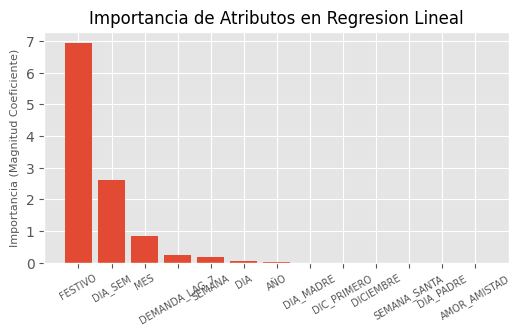

In [42]:
importancia_atributos(lasso, X_test, y_test)

R-cuadrado: 60.10%
R-cuadrado ajustado: 57.56%


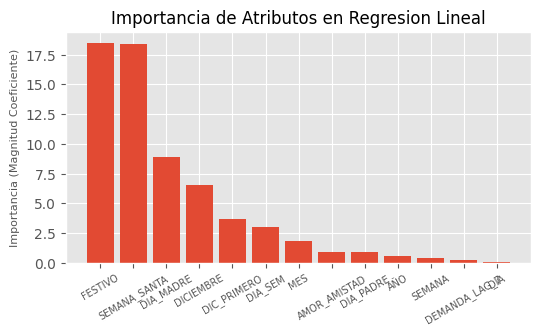

In [44]:
importancia_atributos(ridge, X_test, y_test)

# <b><font color="navy">Modelo 2</span></font></b>

## 9. Atributos de PMS estacional y Seno de Dia_Sem

In [142]:
# Retomar datos iniciales
df_modelo_2 = df.copy()

# Adicionar Promedio movil simple con n=3 de forma estacional
df_modelo_2['PMS_DEMANDA_3'] = df_modelo_2.groupby(['COD_SKU', 'DESC_SKU', 'FESTIVO', 'DIA_SEM','AMOR_AMISTAD','DICIEMBRE','DIC_PRIMERO','DIA_PADRE','DIA_MADRE' ])['DEMANDA'].transform(lambda x: x.rolling(window=12, 
                                                                                        min_periods=1).mean().shift(1))

# Adicionar Seno del Dia de la semana
df_modelo_2['SENO_DIA_SEM'] = np.sin(df_modelo_2['DIA_SEM'])

df_modelo_2

,COD_SKU,DESC_SKU,FECHA,DEMANDA,DIA_SEM,MES,DIA,SEMANA,AÑO,FESTIVO,AMOR_AMISTAD,DIA_PADRE,SEMANA_SANTA,DICIEMBRE,DIC_PRIMERO,DIA_MADRE,DEMANDA_LAG_7,PMS_DEMANDA_3,SENO_DIA_SEM
FECHA,,,,,,,,,,,,,,,,,,,
2021-01-01,PT-001,SKU_1,2021-01-01,10,4,1,1,53,2021,1,0,0,0,1,0,0,NaN,NaN,-0.756802
2021-01-02,PT-001,SKU_1,2021-01-02,12,5,1,2,53,2021,0,0,0,0,0,0,0,NaN,NaN,-0.958924
2021-01-03,PT-001,SKU_1,2021-01-03,15,6,1,3,53,2021,0,0,0,0,0,0,0,NaN,NaN,-0.279415
2021-01-04,PT-001,SKU_1,2021-01-04,11,0,1,4,1,2021,0,0,0,0,0,0,0,NaN,NaN,0.000000
2021-01-05,PT-001,SKU_1,2021-01-05,10,1,1,5,1,2021,0,0,0,0,0,0,0,NaN,NaN,0.841471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,PT-229,SKU_229,2023-12-27,0,2,12,27,52,2023,0,0,0,0,0,0,0,0.0,0.0,0.909297
2023-12-28,PT-229,SKU_229,2023-12-28,0,3,12,28,52,2023,0,0,0,0,0,0,0,0.0,0.0,0.141120
2023-12-29,PT-229,SKU_229,2023-12-29,0,4,12,29,52,2023,0,0,0,0,0,0,0,0.0,0.0,-0.756802


In [143]:
# Seleccionar Referencia
df_modelo_2 = df_modelo_2[df_modelo_2['COD_SKU'] == SKU].copy()

# Eliminar NaN
df_modelo_2 = df_modelo_2.dropna(subset = ['DEMANDA_LAG_7','PMS_DEMANDA_3'])

df_modelo_2.query("DIA_SEM == 0").head(30)

,COD_SKU,DESC_SKU,FECHA,DEMANDA,DIA_SEM,MES,DIA,SEMANA,AÑO,FESTIVO,AMOR_AMISTAD,DIA_PADRE,SEMANA_SANTA,DICIEMBRE,DIC_PRIMERO,DIA_MADRE,DEMANDA_LAG_7,PMS_DEMANDA_3,SENO_DIA_SEM
FECHA,,,,,,,,,,,,,,,,,,,
2021-01-18,PT-013,SKU_13,2021-01-18,12,0,1,18,3,2021,0,0,0,0,0,0,0,20.0,16.000000,0.0
2021-01-25,PT-013,SKU_13,2021-01-25,9,0,1,25,4,2021,0,0,0,0,0,0,0,12.0,14.000000,0.0
2021-02-01,PT-013,SKU_13,2021-02-01,12,0,2,1,5,2021,0,0,0,0,0,0,0,9.0,12.333333,0.0
2021-02-08,PT-013,SKU_13,2021-02-08,4,0,2,8,6,2021,0,0,0,0,0,0,0,12.0,12.250000,0.0
2021-02-15,PT-013,SKU_13,2021-02-15,8,0,2,15,7,2021,0,0,0,0,0,0,0,4.0,10.600000,0.0
2021-02-22,PT-013,SKU_13,2021-02-22,4,0,2,22,8,2021,0,0,0,0,0,0,0,8.0,10.166667,0.0
2021-03-01,PT-013,SKU_13,2021-03-01,7,0,3,1,9,2021,0,0,0,0,0,0,0,4.0,9.285714,0.0
2021-03-08,PT-013,SKU_13,2021-03-08,9,0,3,8,10,2021,0,0,0,0,0,0,0,7.0,9.000000,0.0
2021-03-15,PT-013,SKU_13,2021-03-15,6,0,3,15,11,2021,0,0,0,0,0,0,0,9.0,9.000000,0.0


In [144]:
# Seleccionar variables atributos
atributos = ['DIA_SEM',	'MES',	'DIA',	'SEMANA',	'AÑO',	'FESTIVO',	'AMOR_AMISTAD', 'DIA_PADRE', 'SEMANA_SANTA',
       'DICIEMBRE', 'DIC_PRIMERO', 'DIA_MADRE', 'DEMANDA_LAG_7','PMS_DEMANDA_3', 
            'SENO_DIA_SEM']
# Separar atributos en X y target en y
X = df_modelo_2[atributos]
y = df_modelo_2['DEMANDA']

In [145]:
# Dividir el set de datos: 80% Entrenamiento - 20% Testeo
punto_limite = int(len(df_modelo_2) * 0.8)

# Separar Set de atributos y target por fecha limite
X_train, X_test = X[:punto_limite], X[punto_limite:]
y_train, y_test = y[:punto_limite], y[punto_limite:]

In [146]:
# Entrenar el modelo 2
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Predecir en el set de testeo
y_pred = model_2.predict(X_test)

# Entrenar el modelo con Lasso
lasso = Lasso(alpha=0.3)  # You can tune the alpha parameter
lasso.fit(X_train, y_train)

# Predecir en el set de testeo
y_pred_lasso_2 = lasso.predict(X_test)

ridge = Ridge(alpha=1.5)  # You can tune the alpha parameter
ridge.fit(X_train, y_train)

# Predecir en el set de testeo
y_pred_ridge_2 = ridge.predict(X_test)


MAE%: 28.01%
Sesgo: 2.44%
Score: 30.44%


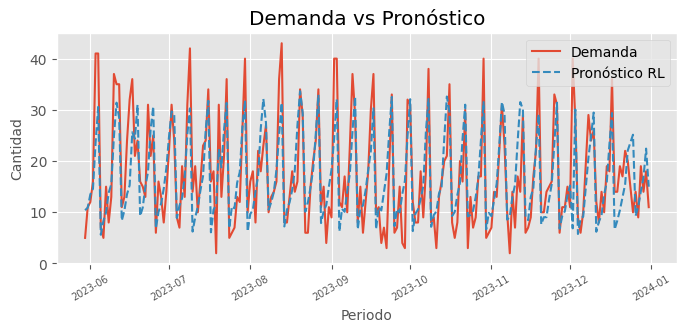

In [147]:
kpi(y_test, y_pred)

MAE%: 28.69%
Sesgo: -1.08%
Score: 29.77%


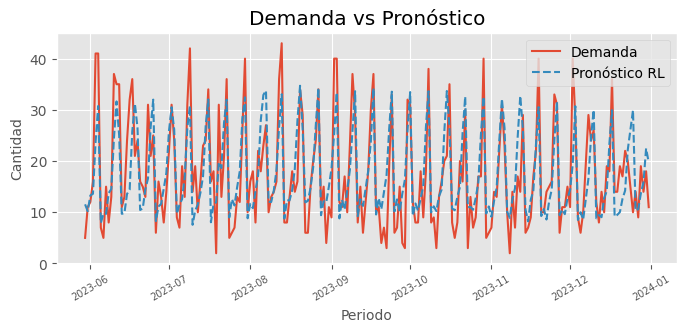

In [148]:
kpi(y_test, y_pred_lasso_2)

MAE%: 27.92%
Sesgo: 2.74%
Score: 30.65%


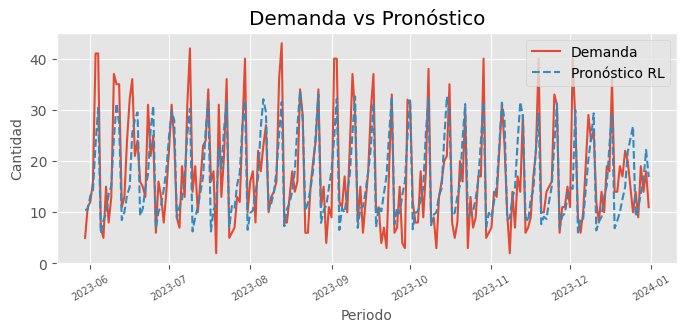

In [149]:
kpi(y_test, y_pred_ridge_2)


R-cuadrado: 61.03%
R-cuadrado ajustado: 58.07%


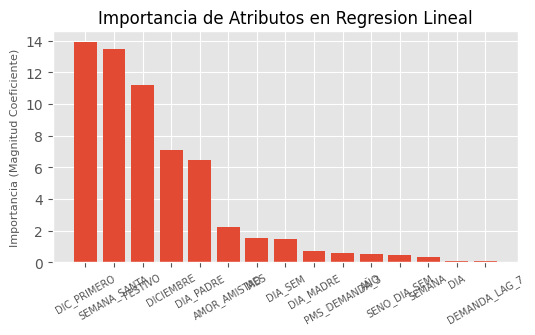

In [150]:
importancia_atributos(model_2, X_test, y_test)

R-cuadrado: 61.74%
R-cuadrado ajustado: 58.84%


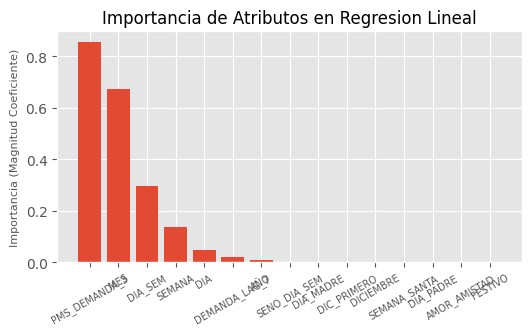

In [151]:
importancia_atributos(lasso, X_test, y_test)

R-cuadrado: 62.71%
R-cuadrado ajustado: 59.89%


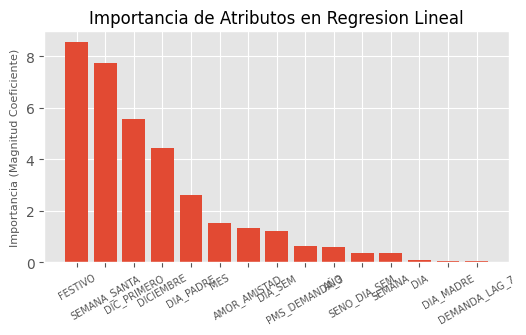

In [152]:
importancia_atributos(ridge, X_test, y_test)

# <b><font color="navy">Modelo 3</span></font></b>

In [151]:
df_modelo_3 = df.copy()

# Calcula el promedio movil simple de los ultimos 3 periodos estacionales incluyendo si es festivo
df_modelo_3['PMS_DEMANDA_3'] = df_modelo_3.groupby(['COD_SKU', 'DESC_SKU', 'DIA_SEM', 'FESTIVO'])['DEMANDA'].transform(lambda x: x.rolling(window=3, 
                                                                                        min_periods=1).mean().shift(1))

# Adiciona el Seno del dia de la semana
df_modelo_3['SENO_DIA_SEM'] = np.sin(df_modelo_3['DIA_SEM'])


In [152]:
#df_modelo_3.query("COD_SKU == 'PT-025' and DIA_SEM == 0").head(60)

In [153]:
# Seleccionar Referencia
df_modelo_3 = df_modelo_3[df_modelo_3['COD_SKU'] == SKU].copy()

# Eliminar NaN
df_modelo_3 = df_modelo_3.dropna(subset = ['DEMANDA_LAG_7','PMS_DEMANDA_3'])

df_modelo_3

,COD_SKU,DESC_SKU,FECHA,DEMANDA,DIA_SEM,MES,DIA,SEMANA,AÑO,FESTIVO,DEMANDA_LAG_7,PMS_DEMANDA_3,SENO_DIA_SEM
FECHA,,,,,,,,,,,,,
2021-01-09,PT-013,SKU_13,2021-01-09,20,5,1,9,1,2021,0,11.0,11.000000,-0.958924
2021-01-10,PT-013,SKU_13,2021-01-10,38,6,1,10,1,2021,0,27.0,27.000000,-0.279415
2021-01-12,PT-013,SKU_13,2021-01-12,4,1,1,12,2,2021,0,8.0,8.000000,0.841471
2021-01-13,PT-013,SKU_13,2021-01-13,11,2,1,13,2,2021,0,10.0,10.000000,0.909297
2021-01-14,PT-013,SKU_13,2021-01-14,7,3,1,14,2,2021,0,8.0,8.000000,0.141120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,PT-013,SKU_13,2023-12-27,9,2,12,27,52,2023,0,19.0,14.333333,0.909297
2023-12-28,PT-013,SKU_13,2023-12-28,19,3,12,28,52,2023,0,17.0,15.333333,0.141120
2023-12-29,PT-013,SKU_13,2023-12-29,14,4,12,29,52,2023,0,22.0,17.333333,-0.756802


In [154]:
# Seleccionar variables atributos
features = ['DIA_SEM', 'MES',	'DIA',	'SEMANA',	'AÑO',	'FESTIVO', 'DEMANDA_LAG_7',  'PMS_DEMANDA_3', 
            'SENO_DIA_SEM',	]

# Separar atributos en X y target en y
X = df_modelo_3[features]
y = df_modelo_3['DEMANDA']

In [155]:
# Dividir el set de datos: 80% Entrenamiento - 20% Testeo
punto_limite = int(len(df_modelo_3) * 0.8)

# Separar Set de atributos y target por fecha limite
X_train, X_test = X[:punto_limite], X[punto_limite:]
y_train, y_test = y[:punto_limite], y[punto_limite:]

In [156]:
# Entrenar modelo 3
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

# Predict on the test set
y_pred = model_3.predict(X_test)


MAE%: 28.83%
Sesgo: 0.47%
Score: 29.31%


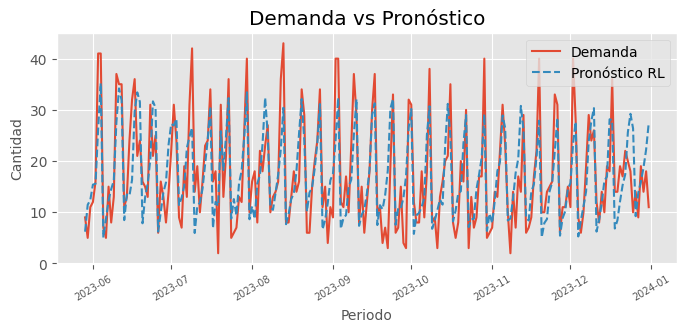

In [157]:
kpi(y_test, y_pred)

R-cuadrado: 61.23%
R-cuadrado ajustado: 59.55%


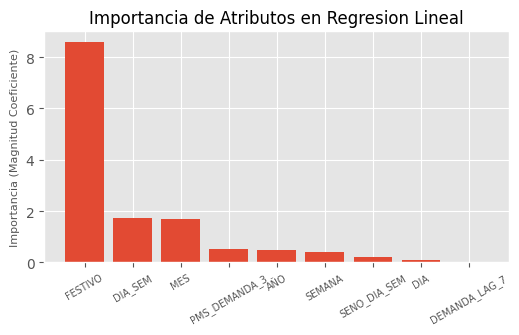

In [158]:
importancia_atributos(model_3, X_test, y_test)

# <b><font color="navy">Ejercicio</span></font></b>

Construya un modelo 4 cambiando algunos de los parametros e incluyendo nuevos atributos como:
- Coseno dia_sem
- Seno, Coseno dia del mes, mes, año
- Lags de 14, 21 ...   días
- Lag de 1 día
- Otros que usted considere